In [1]:
import networkx as nx
from networkx.algorithms import community
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pathEpinionT = "./trust_data.txt"
pathEpinionR = "./ratings_data.txt"
pathDelicious = "./user_contacts.dat"

In [3]:
epiT = nx.read_weighted_edgelist(pathEpinionT)
epiR = nx.read_weighted_edgelist(pathEpinionR)
df = pd.read_csv(pathDelicious, sep="\s+", skiprows=1,  usecols=[0,1],names=['id_u','id_c'])
deli = nx.from_pandas_edgelist(df,source='id_u',target='id_c')

In [4]:
degree_sequence = sorted((d for n, d in deli.degree()), reverse=True)



In [5]:
def desc_graph(g,name):
    print("=============DESCRIPTION GRAPHE "+name+"==========================")
    nb_node = len(g.nodes)
    nb_edges = len(g.edges)
    density = nx.density(g)
    print("NOMBRE DE NOEUDS : "+str(nb_node))
    print("NOMBRE D'ARCS : "+str(nb_edges))
    print("VALEUR DE DENSITÉ DU GRAPHE : "+str(density))
    degree_sequence = sorted((d for n, d in g.degree()), reverse=False)
    dmax = max(degree_sequence)
    print("DEGRÉE MAX DU GRAPHE : "+str(dmax))
    print("DEGRÉE MOYEN DU GRAPHE : "+str(np.sum(degree_sequence)/len(deli.nodes)))
    print("PREMIER QUARTILE DES DEGRÉES: "+str(degree_sequence[int(len(degree_sequence)*1/4)]))
    print("DEGRÉE MÉDIAN DU GRAPHE: "+str(degree_sequence[int(len(degree_sequence)/2)]))
    print("TROISIÈME QUARTILE DES DEGRÉES: "+str(degree_sequence[int(len(degree_sequence)*3/4)]))
    nb_max = degree_sequence.count(max(degree_sequence,key=degree_sequence.count))+3
    ax=sns.histplot(degree_sequence,kde=True,color="blue")
    plt.ylim(0,nb_max)
    ax.lines[0].set_color('crimson')
    plt.show()
    plt.boxplot(degree_sequence)
    plt.show()

=============DESCRIPTION GRAPHE DELICIOUS==========================
NOMBRE DE NOEUDS : 1861
NOMBRE D'ARCS : 7664
VALEUR DE DENSITÉ DU GRAPHE : 0.0044281892611788085
DEGRÉE MAX DU GRAPHE : 90
DEGRÉE MOYEN DU GRAPHE : 8.236432025792585
PREMIER QUARTILE DES DEGRÉES: 4
DEGRÉE MÉDIAN DU GRAPHE: 6
TROISIÈME QUARTILE DES DEGRÉES: 10


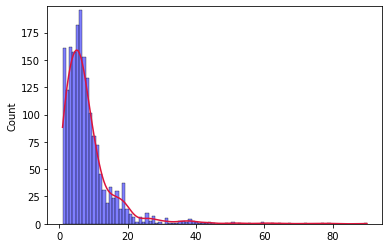

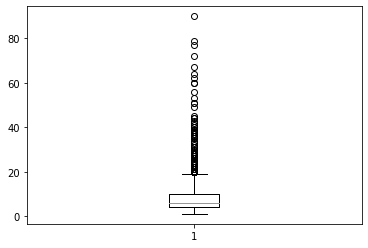

=============DESCRIPTION GRAPHE EPINION TRUST==========================
NOMBRE DE NOEUDS : 49288
NOMBRE D'ARCS : 381217
VALEUR DE DENSITÉ DU GRAPHE : 0.00031385472764359584
DEGRÉE MAX DU GRAPHE : 2598
DEGRÉE MOYEN DU GRAPHE : 409.69048898441696
PREMIER QUARTILE DES DEGRÉES: 1
DEGRÉE MÉDIAN DU GRAPHE: 3
TROISIÈME QUARTILE DES DEGRÉES: 8


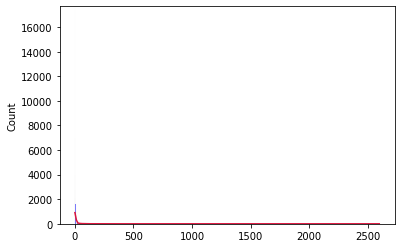

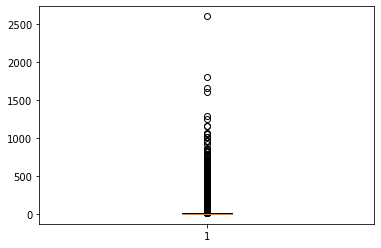

=============DESCRIPTION GRAPHE EPINION RATING==========================
NOMBRE DE NOEUDS : 139738
NOMBRE D'ARCS : 664680
VALEUR DE DENSITÉ DU GRAPHE : 6.807954876248242e-05
DEGRÉE MAX DU GRAPHE : 2096
DEGRÉE MOYEN DU GRAPHE : 714.3256313809779
PREMIER QUARTILE DES DEGRÉES: 1
DEGRÉE MÉDIAN DU GRAPHE: 2
TROISIÈME QUARTILE DES DEGRÉES: 6


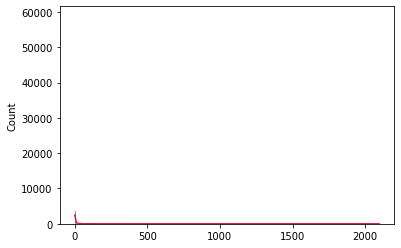

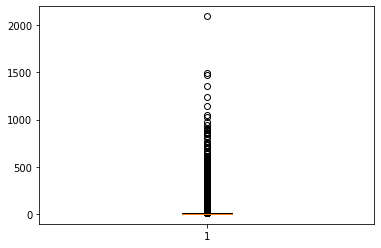

In [6]:
desc_graph(deli,"DELICIOUS")
desc_graph(epiT,"EPINION TRUST")
desc_graph(epiR,"EPINION RATING")
